# Carregamento da base de dados

In [1]:
import pandas as pd

In [47]:
# Exposição de Dados

# Matplotlib
from matplotlib import pyplot as plt

# Plotly
import plotly.express as px

# Seaborn
import seaborn as sns

# Bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
# Ignorar algums alertas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Carrega a base de dados
df = pd.read_csv(r'base_dados.csv', encoding='utf-8')

In [6]:
# Exibe as 5 primeiras linhas da base de dados
df.head()

,Data,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
0,2010-01-01 15:57:36,Computador Lenovo,Computador,2,Venda,10208.56,7496.99,Online,A Vista,MT,Nova Mutum
1,2010-01-04 09:35:31,Computador Lenovo,Computador,3,Compra,9044.01,4491.92,Loja Física,Cartão de Crédito,GO,Rio Quente
2,2010-01-04 09:43:37,Notebook Dell,Notebook,1,Venda,2427.47,1487.71,Loja Física,Transferência Bancária,MS,Juti
3,2010-01-04 10:13:10,Impressora Epson,Impressora,1,Venda,839.06,521.64,Loja Física,Boleto,DF,Brasília
4,2010-01-04 12:03:09,Impressora Epson,Impressora,4,Venda,776.69,342.24,Distribuidor,Boleto,PB,Várzea


In [7]:
# Exibe as 5 ultimas linhas da base de dados
df.tail()

,Data,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
9995,2023-12-27 13:10:19,Notebook Samsung,Notebook,1,Compra,1061.95,459.98,Online,Cartão de Crédito,PI,Alagoinha do Piauí
9996,2023-12-27 14:43:52,Notebook Lenovo,Notebook,4,Compra,2390.38,926.48,Distribuidor,Cartão de Crédito,MT,Nova Mutum
9997,2023-12-28 09:00:54,HD Externo Western Digital,Armazenamento,4,Venda,564.04,238.81,Loja Física,A Vista,AP,Pracuúba
9998,2023-12-28 09:36:28,Teclado Radragon,Teclado,2,Compra,513.55,266.07,Loja Física,Transferência Bancária,SP,Vargem Grande Paulista
9999,2023-12-29 09:25:09,Computador Apple,Computador,3,Venda,8376.00,6015.18,Online,Boleto,RJ,São José do Vale do Rio Preto


In [8]:
# Exibe algumas informações sobre os formatos dos dados de cada coluna do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 10000 non-null  object 
 1   Produto              10000 non-null  object 
 2   Categoria            10000 non-null  object 
 3   Quantidade           10000 non-null  int64  
 4   Tipo                 10000 non-null  object 
 5   Valor Unitário       10000 non-null  float64
 6   Custo                10000 non-null  float64
 7   Canal de Venda       10000 non-null  object 
 8   Método de Pagamento  10000 non-null  object 
 9   Estado               10000 non-null  object 
 10  Município            10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [9]:
# Exibe a quantidade de registros (linha) pela quanidade de atributos (colunas)
df.shape

(10000, 11)

# Tratamento do atributo `Data`

In [10]:
# Converte o atributo 'Data' para o tipo 'pandas.datetime'
df['Data'] = pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 10000 non-null  datetime64[ns]
 1   Produto              10000 non-null  object        
 2   Categoria            10000 non-null  object        
 3   Quantidade           10000 non-null  int64         
 4   Tipo                 10000 non-null  object        
 5   Valor Unitário       10000 non-null  float64       
 6   Custo                10000 non-null  float64       
 7   Canal de Venda       10000 non-null  object        
 8   Método de Pagamento  10000 non-null  object        
 9   Estado               10000 non-null  object        
 10  Município            10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.5+ KB


# Criação dos atributos `Mês` e `Ano`

In [11]:
# Criar colunas especificas para o Mês e o Ano do registro
df.insert(1, 'Mes', df['Data'].dt.month)
df.insert(2, 'Ano', df['Data'].dt.year)
df.head()

,Data,Mes,Ano,Produto,Categoria,Quantidade,Tipo,Valor Unitário,Custo,Canal de Venda,Método de Pagamento,Estado,Município
0,2010-01-01 15:57:36,1,2010,Computador Lenovo,Computador,2,Venda,10208.56,7496.99,Online,A Vista,MT,Nova Mutum
1,2010-01-04 09:35:31,1,2010,Computador Lenovo,Computador,3,Compra,9044.01,4491.92,Loja Física,Cartão de Crédito,GO,Rio Quente
2,2010-01-04 09:43:37,1,2010,Notebook Dell,Notebook,1,Venda,2427.47,1487.71,Loja Física,Transferência Bancária,MS,Juti
3,2010-01-04 10:13:10,1,2010,Impressora Epson,Impressora,1,Venda,839.06,521.64,Loja Física,Boleto,DF,Brasília
4,2010-01-04 12:03:09,1,2010,Impressora Epson,Impressora,4,Venda,776.69,342.24,Distribuidor,Boleto,PB,Várzea


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 10000 non-null  datetime64[ns]
 1   Mes                  10000 non-null  int32         
 2   Ano                  10000 non-null  int32         
 3   Produto              10000 non-null  object        
 4   Categoria            10000 non-null  object        
 5   Quantidade           10000 non-null  int64         
 6   Tipo                 10000 non-null  object        
 7   Valor Unitário       10000 non-null  float64       
 8   Custo                10000 non-null  float64       
 9   Canal de Venda       10000 non-null  object        
 10  Método de Pagamento  10000 non-null  object        
 11  Estado               10000 non-null  object        
 12  Município            10000 non-null  object        
dtypes: datetime64[ns](1), float64(2)

# Análise de Dados

## Analítica

### Vendas ao Longo do Tempo
Permite acompanhar a evolução das vendas ao longo do tempo, identificando tendências e padrões.

* **Relação**: Data e Hora x Valor Unitário
* **Gráfico**: Linhas ou Área

In [61]:
# Filtro de dados relacionados a Data (Ano), ao Tipo (compra ou venda) e a soma do valor unitário
compra_venda_tempo = pd.DataFrame(df.groupby(['Ano', 'Tipo'], as_index=False)['Valor Unitário'].mean().round(2))

titulo = 'Variação Média de Preços ao longo dos Anos'

display(compra_venda_tempo)

,Ano,Tipo,Valor Unitário
0,2010,Compra,1800.12
1,2010,Venda,1968.86
2,2011,Compra,1998.97
3,2011,Venda,2056.23
4,2012,Compra,2047.96
5,2012,Venda,1929.89
6,2013,Compra,1823.59
7,2013,Venda,1819.91
8,2014,Compra,2135.10
9,2014,Venda,2081.98


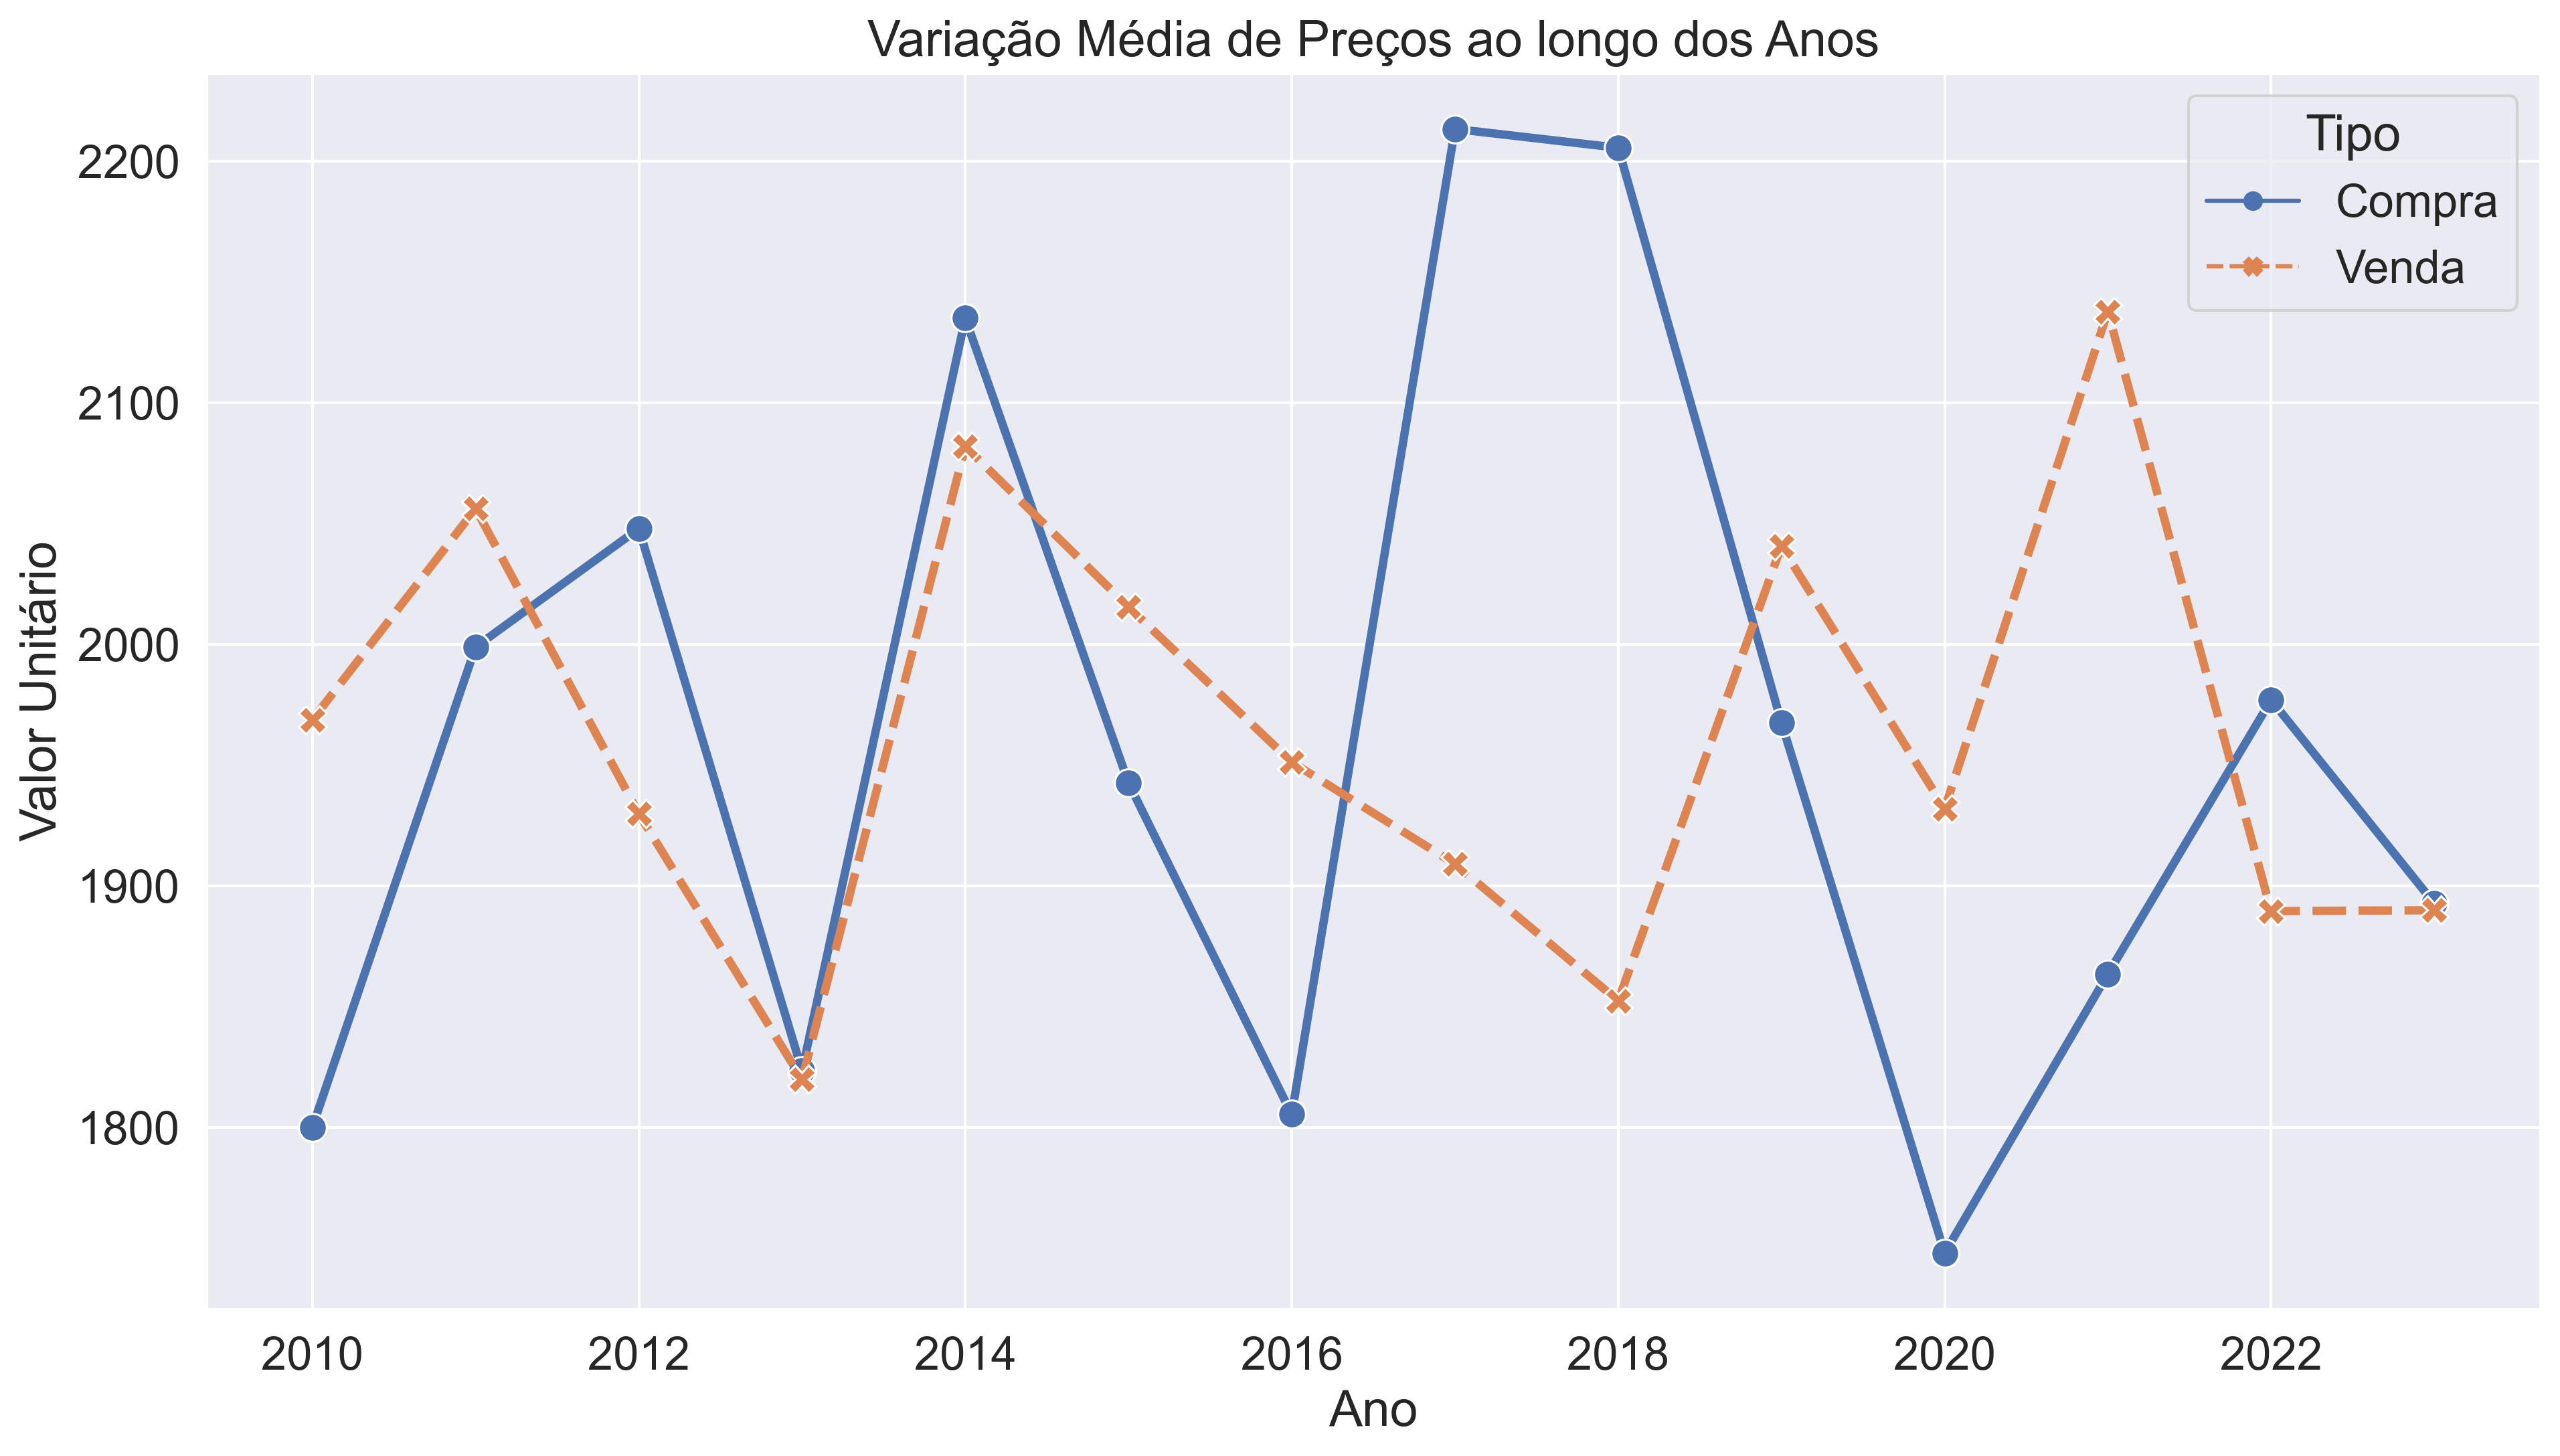

In [70]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=300)
sns.lineplot(data=compra_venda_tempo,
             x='Ano',
             y='Valor Unitário',
             linewidth = 3,
             hue='Tipo',
             style='Tipo',
             markers=True,
             markersize=10
             ).set(title=titulo);
# Aumentar o título do gráfico para destacar mais

In [71]:
fig = px.line(compra_venda_tempo,
              x="Ano",
              y="Valor Unitário",
              color='Tipo',
              title=titulo, markers=True)
fig.update_traces(textposition="top right")
fig.show()

In [72]:
# Utilizando o Bokeh
p = figure(width=900, height=600, title='Variação Média de Preços ao lonog dos Anos', toolbar_location=None)

line1 = compra_venda_tempo[compra_venda_tempo['Tipo'] == 'Compra']
line2 = compra_venda_tempo[compra_venda_tempo['Tipo'] == 'Venda']

p.line(x=line1['Ano'], y=line1['Valor Unitário'], line_width=3, legend_label='Compra', color='blue')
p.scatter(x=line1['Ano'], y=line1['Valor Unitário'], fill_color="white", size=10, color='blue', line_width=2)
p.line(x=line2['Ano'], y=line2['Valor Unitário'], line_width=3, legend_label='Venda', color='red')
p.scatter(x=line2['Ano'], y=line2['Valor Unitário'], fill_color="white", size=10, color='red', line_width=2)
show(p)

### Desempenho dos Produtos
Mostra quais produtos têm maior saida, auxiliando no planejamnto de estoque e promoções.
* **Relação**: Produto x Quantidade Vendida
* **Gráfico**: Barras

In [73]:
desempenho_produto = pd.DataFrame(df[df['Tipo'] == 'Venda'].groupby(['Produto'], as_index=False)['Quantidade'].sum())
desempenho_produto.sort_values(by='Quantidade', ignore_index=True, ascending=False, inplace=True)
desempenho_produto_minimo = desempenho_produto['Quantidade'].min()*0.95
desempenho_produto_maximo = desempenho_produto['Quantidade'].max()*1.01

titulo = 'Análise de Desempenho x Produto'

display(desempenho_produto)

,Produto,Quantidade
0,Teclado Logitech,571
1,Computador Lenovo,565
2,Computador Apple,553
3,Mouse Redragon,544
4,Mouse Multilaser,525
5,Mouse C3Teck,525
6,Impressora Samsung,521
7,HD Externo Adata,503
8,Teclado Microsoft,501
9,Monitor AOC,497


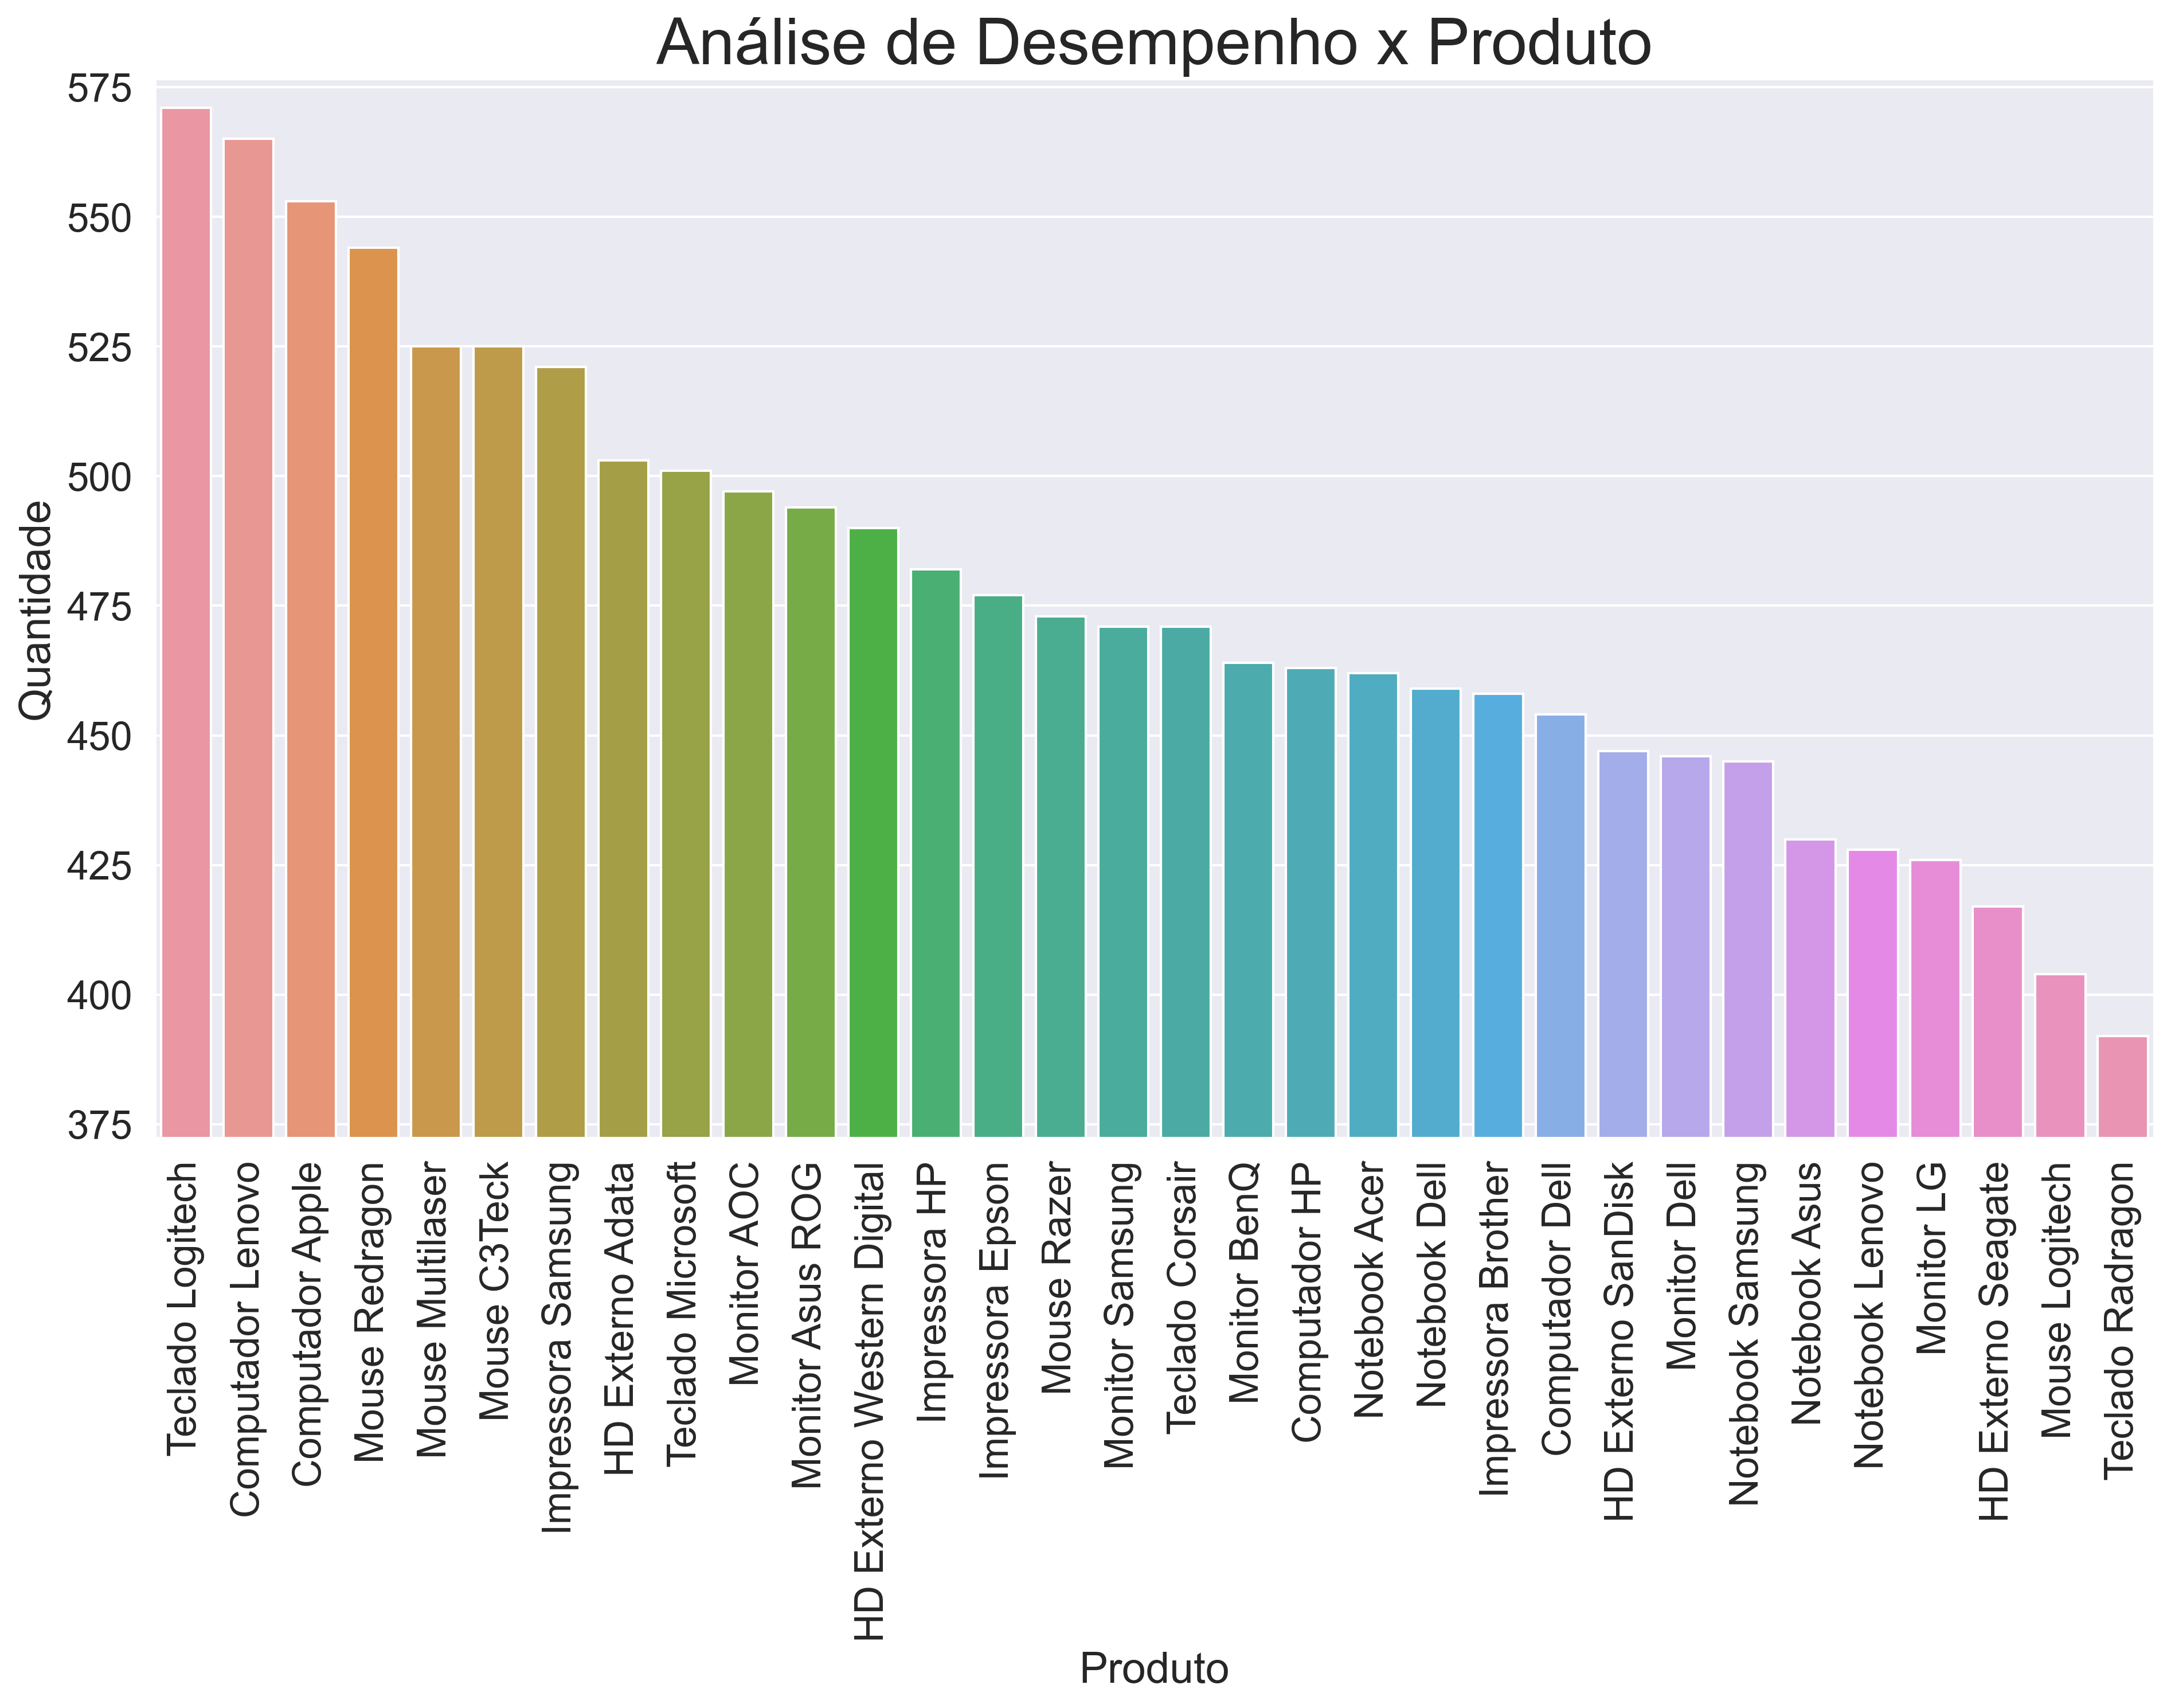

In [84]:
# Seaborn 1
fig, gfg = plt.subplots(figsize=(15, 8), dpi=300)
gfg = sns.barplot(data=desempenho_produto, x="Produto", y="Quantidade")
gfg.set_title(titulo, fontsize=27)
gfg.set_ylim(desempenho_produto_minimo, desempenho_produto_maximo)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

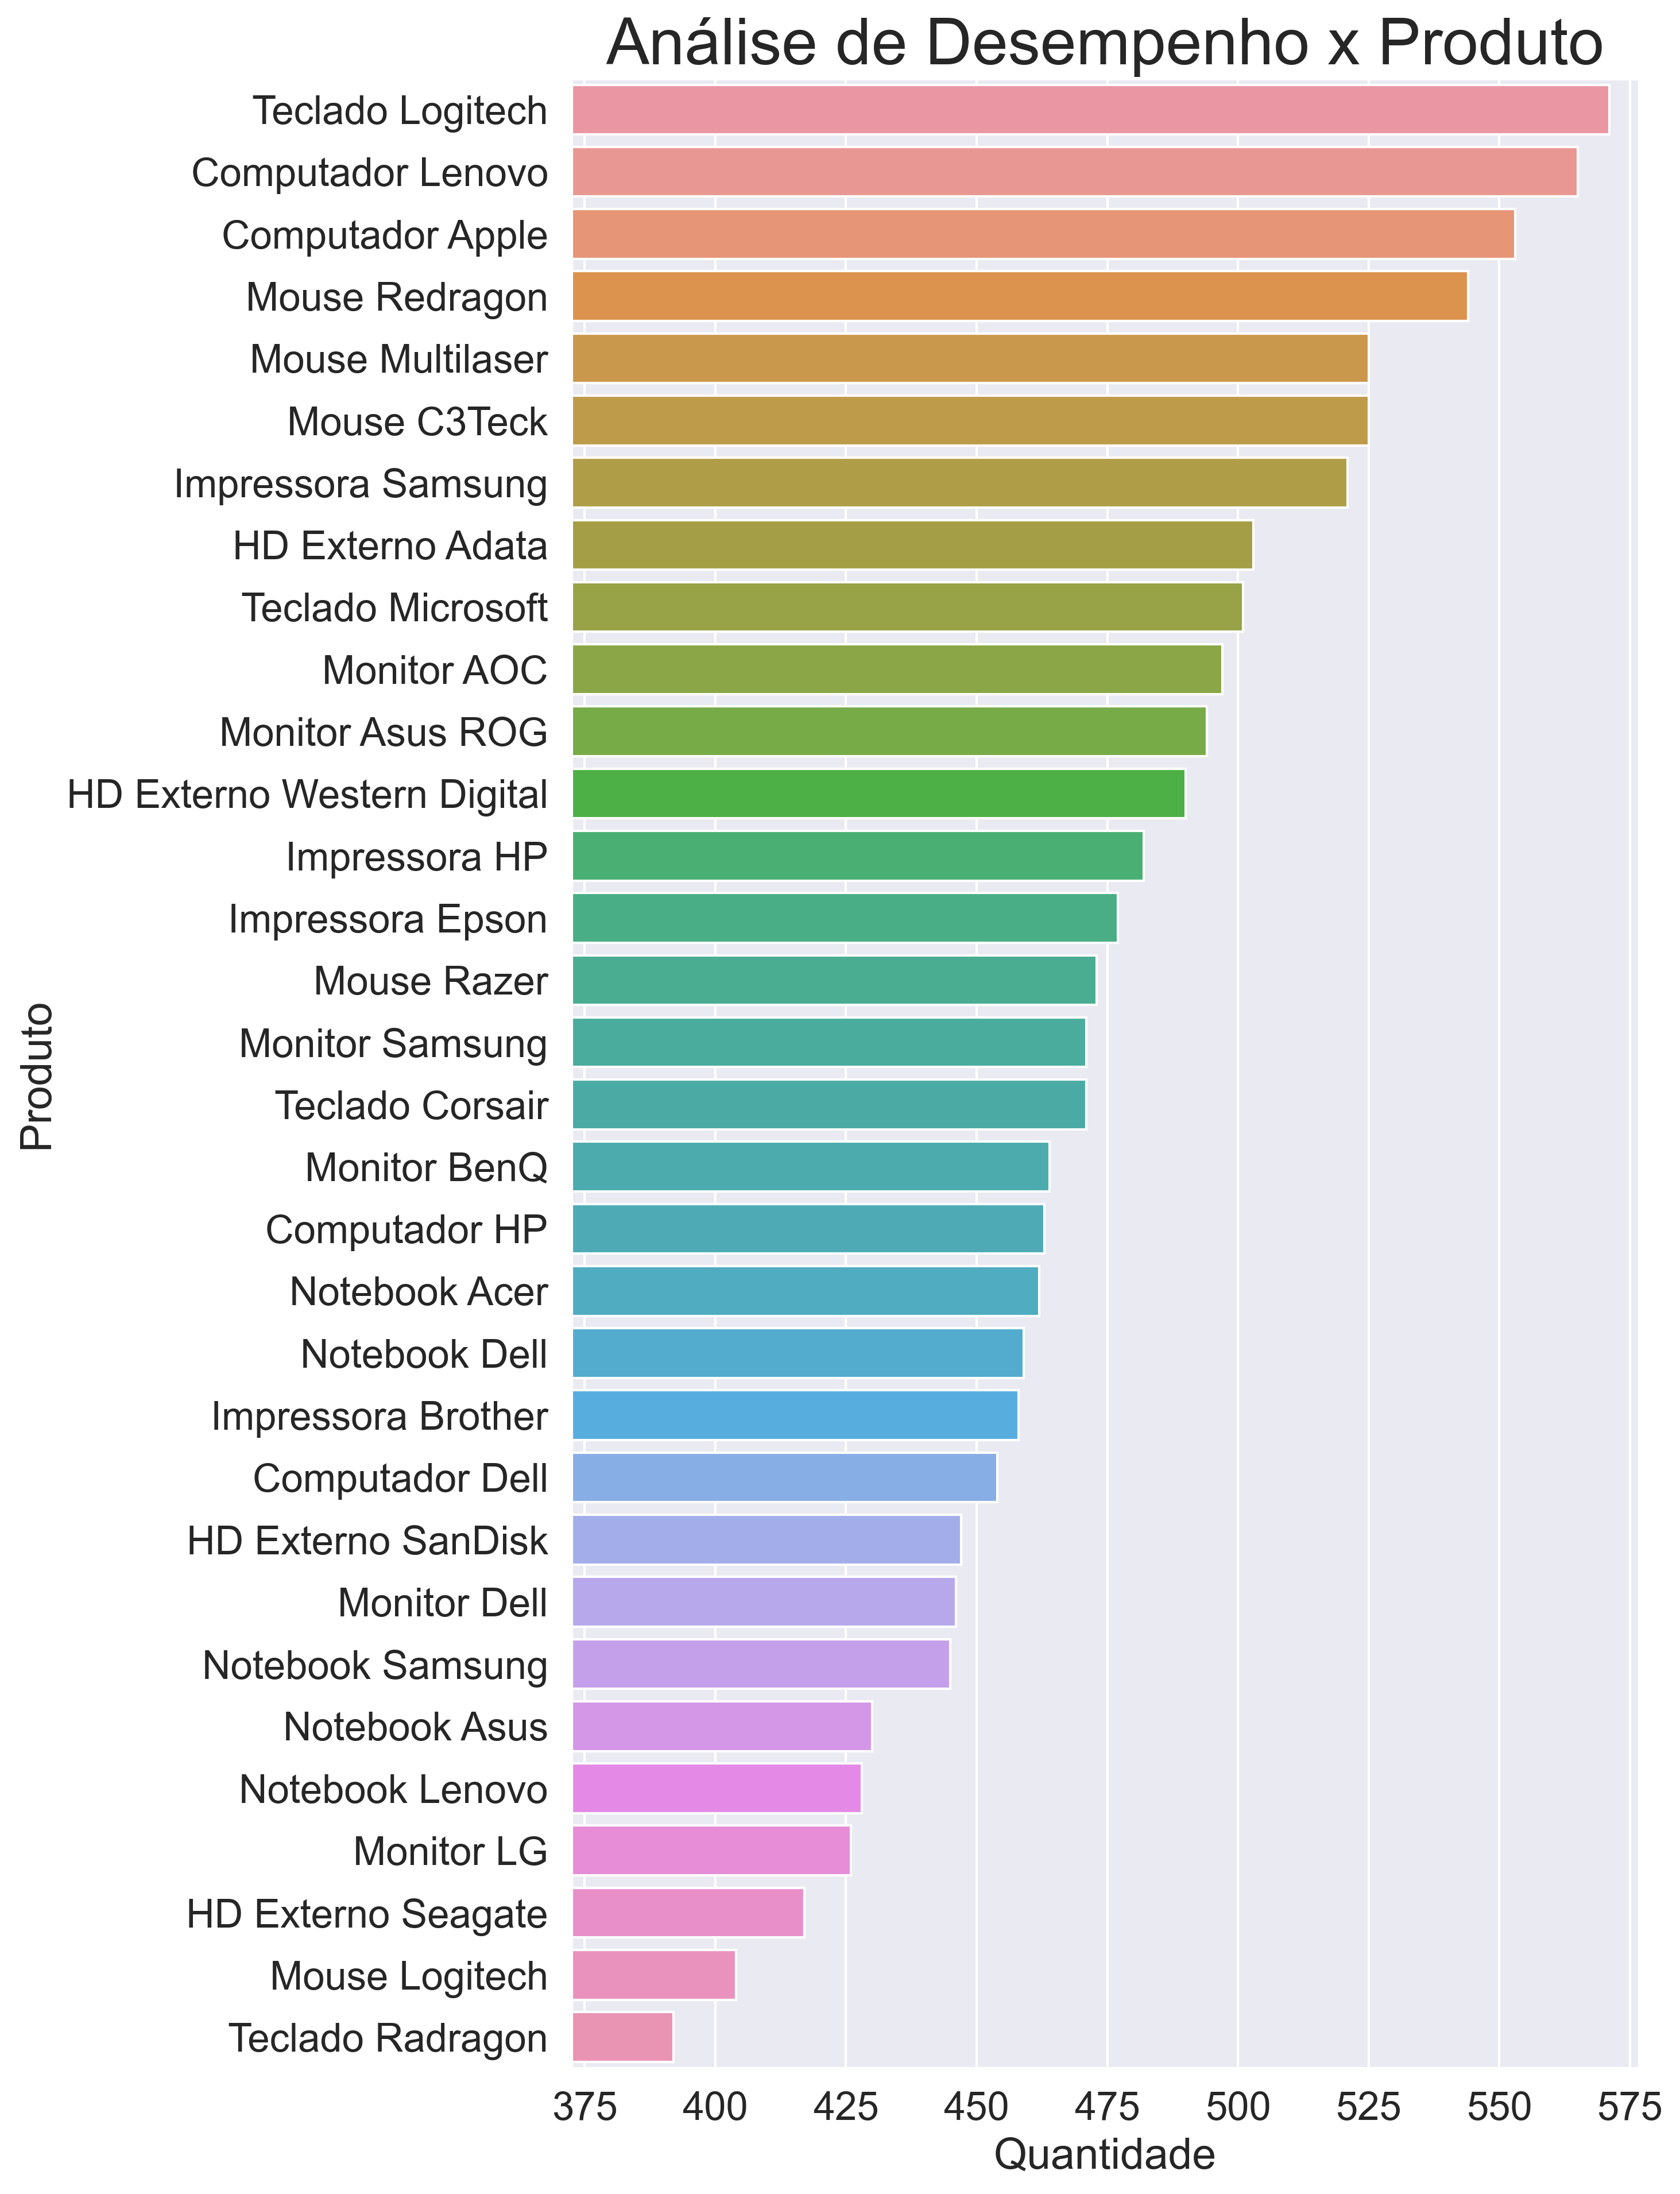

In [88]:
# Seaborn 2
fig, gfg = plt.subplots(figsize=(8, 15), dpi=300)
gfg = sns.barplot(data=desempenho_produto, x="Quantidade", y="Produto")
gfg.set_title(titulo, fontsize=27)
gfg.set_xlim(desempenho_produto_minimo, desempenho_produto_maximo);

In [89]:
# Plotly Express 1
fig = px.bar(desempenho_produto, x="Produto", y="Quantidade", title=titulo)
fig.update_layout(yaxis_range=[desempenho_produto_minimo, desempenho_produto_maximo])
fig.show()

In [90]:
# Plotly Express 2
fig = px.bar(desempenho_produto, x="Quantidade", y="Produto", title=titulo)
fig.update_layout(xaxis_range=[desempenho_produto_minimo, desempenho_produto_maximo], height=700)
fig.show()

In [91]:
# Bokeh 1
bar_produtos = desempenho_produto['Produto'].values.tolist()
bar_quantidade = desempenho_produto['Quantidade'].values.tolist()

p = figure(x_range=bar_produtos, title=titulo, width=900, height=500)
p.vbar(x=bar_produtos, top=bar_quantidade, width=0.9)
p.xaxis.major_label_orientation = "vertical"
p.xaxis.subgroup_label_orientation = "normal"
p.y_range.start = desempenho_produto_minimo
p.y_range.end = desempenho_produto_maximo
show(p)

In [92]:
# Bokeh 2
bar_produtos = desempenho_produto['Produto'].values.tolist()
bar_quantidade = desempenho_produto['Quantidade'].values.tolist()

p = figure(y_range=bar_produtos, title=titulo, width=600, height=600)
p.hbar(y=bar_produtos, right=bar_quantidade, height=0.9)
p.x_range.start = desempenho_produto_minimo
p.x_range.end = desempenho_produto_maximo
show(p)

### Lucratividade por Categoria
Avalia a margem de lucro por categoria, informando sobre a rentabilidade dos seguimentos.
* **Relação**: Categoria do Produto x Lucro (Quantidade do Produto x (Valor Unitário - Valor do Custo))
* **Gráfico**: Barras Empilhadas

In [ ]:
categoria_quantidade_produto_total = pd.DataFrame(df.groupby(['Categoria'], as_index=False)['Quantidade'].sum())

categoria_quantidade_produto_total.sort_values(by='Quantidade', ascending=False, inplace=True)

categoria_quantidade_produto_total_max = int(categoria_quantidade_produto_total['Quantidade'].max() * 1.01)
categoria_quantidade_produto_total_min = int(categoria_quantidade_produto_total['Quantidade'].min()*0.95)

display(categoria_quantidade_produto_total)

In [ ]:
# Seaborn 1
gfg = sns.barplot(x=categoria_quantidade_produto_total['Categoria'], y=categoria_quantidade_produto_total['Quantidade'])
gfg.set_ylim(categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

In [ ]:
# Seaborn 2
gfg = sns.barplot(x=categoria_quantidade_produto_total['Quantidade'], y=categoria_quantidade_produto_total['Categoria'])
gfg.set_xlim(categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max);

In [ ]:
# Plotly Express 1
fig = px.bar(categoria_quantidade_produto_total, x="Categoria", y="Quantidade", title='Vendas por Categoria')
fig.update_layout(yaxis_range=[categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max])
fig.show()

In [ ]:
# Plotly Express 2
fig = px.bar(categoria_quantidade_produto_total, x="Quantidade", y="Categoria", title='Vendas por Categoria')
fig.update_layout(xaxis_range=[categoria_quantidade_produto_total_min, categoria_quantidade_produto_total_max])
fig.show()

////////////////////////////////////////////

In [ ]:
categoria_valor_unitario_total = pd.DataFrame(df.groupby(['Categoria'], as_index=False)['Valor Unitário'].sum())
categoria_valor_unitario_total.sort_values(by='Valor Unitário', ascending=False, inplace=True)
categoria_valor_unitario_total_max = int(categoria_valor_unitario_total['Valor Unitário'].max() * 1.01)
categoria_valor_unitario_total_min = int(categoria_valor_unitario_total['Valor Unitário'].min()*0.95)
display(categoria_valor_unitario_total)

In [ ]:
# Seaborn 1
gfg = sns.barplot(x=categoria_valor_unitario_total['Categoria'], y=categoria_valor_unitario_total['Valor Unitário'])
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

In [ ]:
# Seaborn 2
gfg = sns.barplot(x=categoria_valor_unitario_total['Valor Unitário'], y=categoria_valor_unitario_total['Categoria']);

In [ ]:
# Plotly Express 1
fig = px.bar(categoria_valor_unitario_total, x="Categoria", y="Valor Unitário", title='Vendas por Categoria', color='Categoria')
fig.show()

In [ ]:
# Plotly Express 2
fig = px.bar(categoria_valor_unitario_total, x="Valor Unitário", y="Categoria", title='Vendas por Categoria', color='Categoria')
fig.show()

////////////////////////////////////////////

In [ ]:
categoria_custo_total = pd.DataFrame(df.groupby(['Categoria'], as_index=False)['Custo'].sum())
categoria_custo_total.sort_values(by='Custo', ascending=False, inplace=True)
categoria_custo_total_max = int(categoria_custo_total['Custo'].max() * 1.01)
categoria_custo_total_min = int(categoria_custo_total['Custo'].min() * 0.95)
display(categoria_custo_total)

In [ ]:
# Seaborn 1
gfg = sns.barplot(x=categoria_custo_total['Categoria'], y=categoria_custo_total['Custo'])
gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90);

In [ ]:
# Seaborn 1
gfg = sns.barplot(x=categoria_custo_total['Custo'], y=categoria_custo_total['Categoria']);

In [ ]:
# Plotly Express 1
fig = px.bar(categoria_custo_total, x="Categoria", y="Custo", title='Vendas por Categoria', color='Categoria')
fig.show()

In [ ]:
# Plotly Express 2
fig = px.bar(categoria_custo_total, x="Custo", y="Categoria", title='Vendas por Categoria', color='Categoria')
fig.show()

////////////////////////////////////////////

Problemas básicos de como estruturar esta seleção para fazer um bar-charts

In [ ]:
categoria_quantidade_custo_unitario_total = pd.DataFrame(df.groupby(['Categoria'], as_index=False)[['Quantidade', 'Custo', 'Valor Unitário']].sum())
categoria_quantidade_custo_unitario_total.sort_values(by='Custo', ascending=False, inplace=True)
categoria_quantidade_custo_unitario_total_max = int(categoria_quantidade_custo_unitario_total['Custo'].max() * 1.01)
categoria_quantidade_custo_unitario_total_min = int(categoria_quantidade_custo_unitario_total['Custo'].min() * 0.95)
display(categoria_quantidade_custo_unitario_total)

In [ ]:
# Seaborn 1

# Seaborn 2

In [ ]:
# Plotly Express 1

# Plotly Express 2

////////////////////////////////////////////

In [ ]:
lucratividade_categoria = pd.DataFrame()
lucratividade_categoria['Categoria'] = df_locratividade_categoria['Categoria']
lucratividade_categoria['Lucro'] = df_locratividade_categoria['Valor Unitário'] - df_locratividade_categoria['Custo']

lucratividade_categoria.sort_values(by='Lucro', ascending=False, inplace=True)

display(lucratividade_categoria)

In [ ]:
# Plotly Express 1
fig = px.bar(lucratividade_categoria, x="Categoria", y="Lucro", title='Lucro por Categoria', color='Categoria')
fig.show()

### Fluxo de Entrada e Saída
Monitora o fluxo de produtos, ajudando a entender o movimento do inventário.
* **Relação**: Data x Entrada ou Saida de Produto (Quantidade) (Compra x Venda)
* **Gráfico**: Fluxo de Caixa

### Canais de Venda
Compara a performance de vendas online versus loja física, orientando estratégias de marketing e venda.
* **Relação**: Meio de Venda (Canal de Venda) x Valor Total de Vendas.
* **Pizza** ou Donut.

In [ ]:
canal_venda_valor_unitario = pd.DataFrame(df.groupby('Canal de Venda')['Valor Unitário'].sum())
display(canal_venda_valor_unitario)

In [ ]:
fig = px.pie(canal_venda_valor_unitario, values=canal_venda_valor_unitario.values, names=canal_venda_valor_unitario.index, title='Relação entre Meio de Cenda e Total de Vendas')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20)
fig.update_layout(margin=dict(t=70, b=20, l=0, r=0), width=600)
fig.show();

### Preferência de Pagamento
Identifica as formas de pagamento preferidas pelos clientes, podendo influenciar as opções oferecidas.
* **Relação**: Forma de Pagamento (Método de Pagamento) x Valor Total
* **Gráfico**: Barras Horizontais

In [ ]:
metodo_pagamento_valor_total = pd.DataFrame(df.groupby('Método de Pagamento')['Valor Unitário'].sum())
display(metodo_pagamento_valor_total)

In [ ]:
# Plotly Express 1
fig = px.bar(metodo_pagamento_valor_total, x=metodo_pagamento_valor_total.index, y=metodo_pagamento_valor_total.values, title='Preferência de Pagamento', color=metodo_pagamento_valor_total.index)
fig.show()

In [ ]:
# Plotly Express 2
fig = px.bar(metodo_pagamento_valor_total, x=metodo_pagamento_valor_total.values, y=metodo_pagamento_valor_total.index, title='Preferência de Pagamento', color=metodo_pagamento_valor_total.index)
fig.show()

In [ ]:
fig = px.pie(metodo_pagamento_valor_total, values=metodo_pagamento_valor_total.values, names=metodo_pagamento_valor_total.index, title='Preferência de Pagamento')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20)
fig.update_layout(margin=dict(t=70, b=20, l=0, r=0), width=600)
fig.show();

### Análise Geográfica
Destaca as áreas geográficas com maior volume de vendas, direcionando esforços de marketing localizados.
* **Relação**: Cidade e Estado x Valor Total de Venda
* **Gráfico**: Mapa de Calor

# Para um outro dia...

### Relacionamento de Dados

In [ ]:
# Relacionar Data de Transição com o volume de compra e venda para identificar padrões ao longo do tempo
vol_compra_venda = pd.DataFrame(df.groupby(['Ano', 'Mes','Tipo'], as_index=False)['Quantidade'].sum())
display(vol_compra_venda)

### Análise de Produtos

In [ ]:
# Correlacionar o Produto com a quantidade vendida (produtos mais populares)
vol_produto_vendido = pd.DataFrame(df[(df['Tipo'] == 'Venda')].groupby(['Ano', 'Produto'], as_index=False)['Quantidade'].sum())
display(vol_produto_vendido)

In [ ]:
display(vol_produto_vendido)

In [ ]:
# Os 3 (três) produtos mais vendidos entre 2010 e 2024
vol_produto_vendido.iloc[vol_produto_vendido['Quantidade'].argsort()[-3:]]

In [ ]:
vol_produto_vendido.groupby(['Ano'], as_index=False)['Quantidade'].sum()

### Análise de Preço

In [ ]:
# Associar valor unitário do produto com o tipo de transação para entender a dinâmica de preços

## Tática

## Estratégica

# Exportação da Base de Dados

In [ ]:
display(df)

In [ ]:
df.to_csv(r'base_dados_tratada.csv', index=False, encoding='utf-8')